<a href="https://colab.research.google.com/github/zhChenOuO/ml_virtual_currency/blob/main/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finlab_crypto > log.txt
!pip install talib-binary > log.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import finlab_crypto
finlab_crypto.setup()

|------------------------------
| Google Drive not connected!  
|------------------------------
|
| Please connect google drive:
Mounted at /content/drive


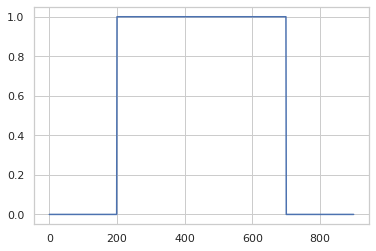

In [9]:
import pandas as pd
s = pd.Series([0]*200+[1]*500+[0]*200)

s.plot()

In [5]:
from finlab_crypto import indicators

indicators??

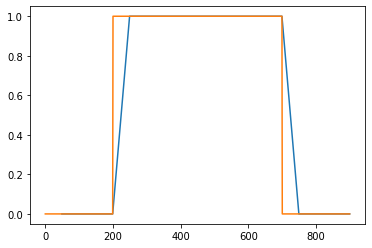

In [ ]:
trend = indicators.trends['sma'](s,50)
trend.plot()
s.plot()

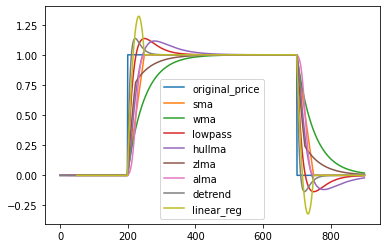

In [ ]:
filter_result = pd.DataFrame()
filter_result['original_price'] = s

for name, func in indicators.trends.items():
  trend = func(s,50)
  filter_result[name] = trend

filter_result.plot() 

In [3]:
ohlcv = finlab_crypto.crawler.get_all_binance("BTCUSDT","4h")

All caught up..!


  0%|          | 0/1568 [00:00<?, ?it/s]

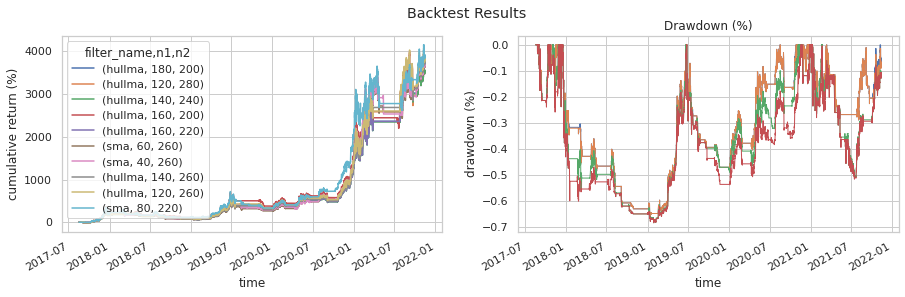

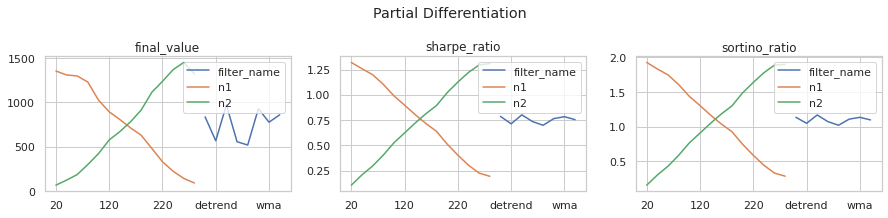

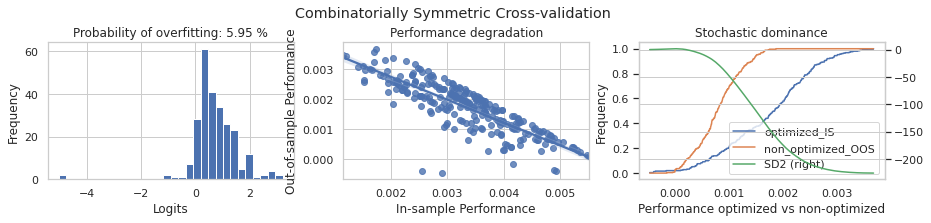

Output()

In [6]:
from finlab_crypto import Strategy

@Strategy(filter_name='sma',n1=20,n2=60)
def trend_strategy(ohlcv):
  fn = trend_strategy.filter_name
  v1 = trend_strategy.n1
  v2 = trend_strategy.n2

  close = ohlcv.close
  sma20 = indicators.trends[fn](close,v1)
  sma60 = indicators.trends[fn](close,v2)

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

  return entries, exits

import numpy as np
variables = {
    'filter_name': list(indicators.trends.keys()),
    'n1': np.arange(20,300,20),
    'n2': np.arange(20,300,20)
}

portfolio = trend_strategy.backtest(ohlcv,variables=variables, freq='4h',plot=True)



In [7]:
detrend = portfolio.daily_returns() - portfolio.daily_returns().mean()
samples = detrend.unstack().values

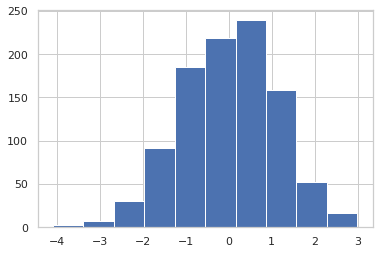

In [11]:
import random

ndays = len(portfolio.daily_returns())

random_returns = []

for i in range(1000):
  random_returns.append(sum(random.choices(samples,k=ndays)))

pd.Series(random_returns).hist()

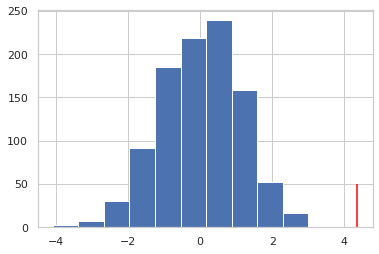

In [12]:
best_result = portfolio.final_value().sort_values().index[-1]

best_result_value = portfolio.daily_returns()[best_result].sum()


pd.Series(random_returns).hist()

import matplotlib.pyplot as plt

plt.vlines(best_result_value,0,50,color = 'red')